# Imports

In [21]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# # Location
# from shapely.geometry import Point
# from geopandas import GeoDataFrame
# import geopandas as gpd

import my_pickle as mp

# import warnings
# warnings.filterwarnings('ignore')

# from sklearn.neighbors import KernelDensity

# Read in data

In [15]:
user_df = mp.unjson_it('data_user')
user_df = mp.reinstate_date(user_df,['activeAt', 'available', 'birthday','created','updated'])

convo_df = mp.unjson_it('data_convo')
message_df = mp.unjson_it('data_message') 
master_df = mp.unjson_it('data_master')

print("Make sure we're not using ECT data")
print(convo_df.timestamp.max())

# turn urgency negative (to make graphs easier to read for now
master_df.urgency_sender = master_df.urgency_sender.apply(lambda x: -x)
master_df.urgency_receiver = master_df.urgency_receiver.apply(lambda x: -x)

Make sure we're not using ECT data
2017-10-01 06:37:20.466000


# Split into successful and unsuccessful

In [16]:
# if we want to droprows without urgency
# master_df = master_df.dropna(axis=0,subset=['urgency_receiver'])

# separate dataset into with and without responses
with_responses = master_df[master_df.response == 1]
without_responses = master_df[master_df.response == 0]

# Useful Fn

In [17]:
# fn to display plot
def plot_feature(col, bins=None):
    with_resp = with_responses[col].hist(figsize = (16,4), bins = bins, alpha = .5)
    without_resp = without_responses[col].hist(figsize = (16,4), bins = bins,alpha = .3, color='r')
    
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Number of Messages',fontsize=14)
    plt.legend(['Response',"No Response"])
    plt.show()
    print(col+" with response: {:.9f}".format(with_responses[col].mean()))
    print(col+" without response: {:.9f}\n\n".format(without_responses[col].mean()))

# RESULTS FROM CONTINUOUS ANALYSIS

## 1. urgency_receiver

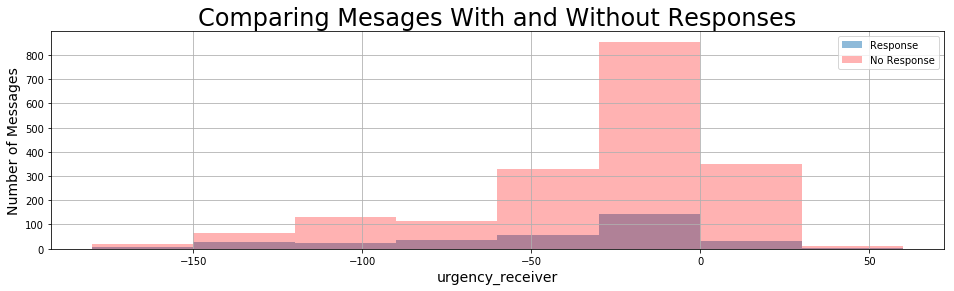

urgency_receiver with response: -37.522309711
urgency_receiver without response: -29.750974659




In [22]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('urgency_receiver', np.arange(-180, 90, 30))

In [23]:
# with_responses =with_responses[with_responses.urgency_receiver >-180]
# without_responses =without_responses[with_responses.urgency_receiver >-180]
# with_responses =with_responses[with_responses.urgency_receiver <30]
# without_responses =without_responses[with_responses.urgency_receiver <30]
bin_size =7

with_responses['urgency_receiver_bin'] = with_responses.urgency_receiver.apply(lambda x: int(x/bin_size))
without_responses['urgency_receiver_bin'] = without_responses.urgency_receiver.apply(lambda x: int(x/bin_size))
counts_with = with_responses.groupby(['urgency_receiver_bin']).uid_receiver.count()
counts_without = without_responses.groupby(['urgency_receiver_bin']).uid_receiver.count()
all_counts = pd.concat([counts_with,counts_without], axis=1)
all_counts.columns = ['counts_with', 'counts_without']
all_counts = all_counts.fillna(0)
all_counts['total'] = all_counts.counts_with+all_counts.counts_without
all_counts['percent_active'] = all_counts.counts_with/all_counts.total
all_counts['percent_not_active'] = all_counts.counts_without/all_counts.total
plt.plot(all_counts['percent_active'])
plt.xlim( (-12, 4) )  # set the xlim to xmin, xmax
plt.ylim( (0, .4) )  # set the xlim to xmin, xmax
plt.title('User Responsiveness',fontsize=18 )
plt.xlabel('Time Left to Find an Aparment (weeks)',fontsize=14)
plt.ylabel("Probability of Responding",fontsize=14)
plt.show()

# range(0,range_val*bin_size,bin_size),
# [0:range_val]

ValueError: cannot convert float NaN to integer

In [32]:
all_counts.head()

,counts_with,counts_without,total,percent_active,percent_not_active
urgency_receiver_bin,,,,,
-1472,0.0,1.0,1.0,0.0,1.0
-1300,0.0,1.0,1.0,0.0,1.0
-1275,0.0,1.0,1.0,0.0,1.0
-1113,0.0,1.0,1.0,0.0,1.0
-1082,0.0,1.0,1.0,0.0,1.0


# 3. Len Receiver Abt Section

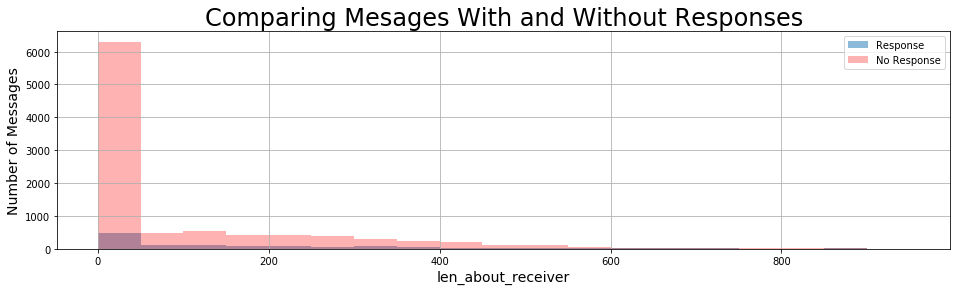

len_about_receiver with response: 194.974424552
len_about_receiver without response: 113.288617886




In [344]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('len_about_receiver', np.arange(0, 1000, 50))

In [348]:

master_df['len_about_receiver_bins'] = master_df['len_about_receiver'].apply(lambda x:int(x/10))

In [350]:
binned_about_receiver = master_df.groupby(['len_about_receiver_bins','response']).const.count()

In [353]:
binned_about_receiver.head()

len_about_receiver_bins  response
0                        0           5856
                         1            419
1                        0             67
                         1              5
2                        0            121
Name: const, dtype: int64

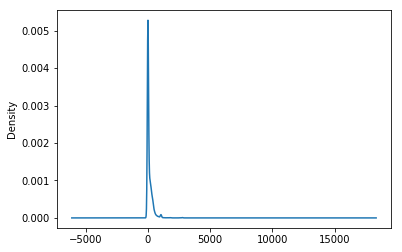

In [335]:
master_df.len_about_receiver.plot.kde()
plt.show()

AttributeError: Unknown property kind

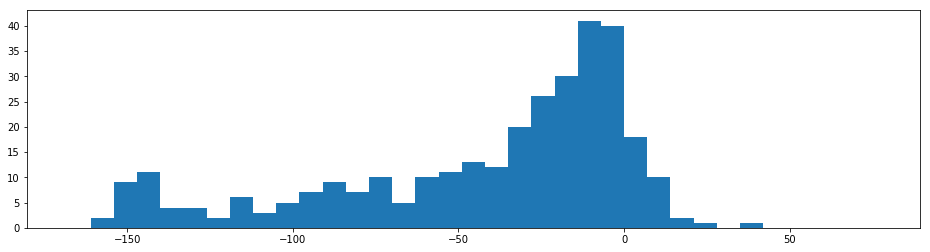

In [328]:
col = 'urgency_receiver'
bins = np.arange(-168, 84, 7)
with_resp = with_responses[col].hist(figsize = (16,4), bins = bins, alpha = .5,kind='line')
without_resp = without_responses[col].hist(figsize = (16,4), bins = bins, alpha = .3, color='r')

plt.xlabel(col,fontsize=14)
plt.ylabel('Number of Messages',fontsize=14)
plt.legend(['Response',"No Response"])
plt.show()
print(col+" with response: {:.9f}".format(with_responses[col].mean()))
print(col+" without response: {:.9f}\n\n".format(without_responses[col].mean()))

In [325]:
master_df[col].hist(figsize = (16,4), by='response'==1,bins = bins, alpha = .5)

KeyError: False

In [ ]:
with_responses.urgency_receiver.

TypeError: 'AxesSubplot' object is not iterable

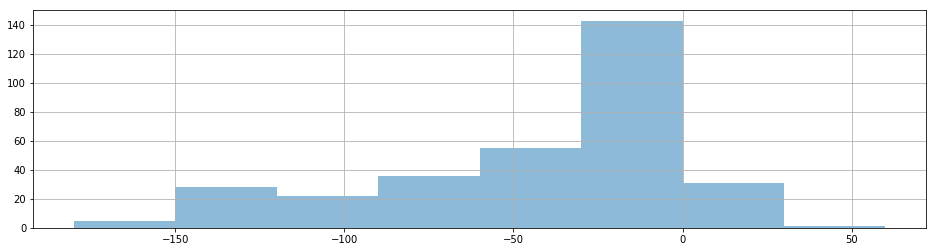

In [252]:
n,bins,patches = with_responses[col].hist(figsize = (16,4), bins = bins, alpha = .5)

In [280]:
with_responses['urgency_receiver_mod_31'] = \
    with_responses.urgency_receiver.apply(lambda x: int(x/31) if x%1==0 else None)
without_responses['urgency_receiver_mod_31'] = \
    without_responses.urgency_receiver.apply(lambda x: int(x/31) if x%1==0 else None)

In [290]:
one = with_responses.groupby('urgency_receiver_mod_31').count().const
two = without_responses.groupby('urgency_receiver_mod_31').count().const

In [305]:
result = pd.concat([one, two], axis=1)
result.columns = ['with_','without_']

In [308]:
result['sum_'] = result.with_ + result.without_

In [309]:
result['percent'] = result.with_ / result.sum_

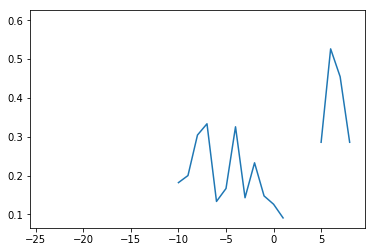

In [313]:
plt.plot(result.percent)

In [317]:
result.iloc[16:28]

,with_,without_,sum,sum_,percent
urgency_receiver_mod_31,,,,,
-10.0,2.0,9.0,11.0,11.0,0.181818
-9.0,3.0,12.0,15.0,15.0,0.200000
-8.0,7.0,16.0,23.0,23.0,0.304348
-7.0,7.0,14.0,21.0,21.0,0.333333
-6.0,4.0,26.0,30.0,30.0,0.133333
-5.0,4.0,20.0,24.0,24.0,0.166667
-4.0,28.0,58.0,86.0,86.0,0.325581
-3.0,22.0,132.0,154.0,154.0,0.142857
-2.0,34.0,112.0,146.0,146.0,0.232877


### TIME TO RESPOND

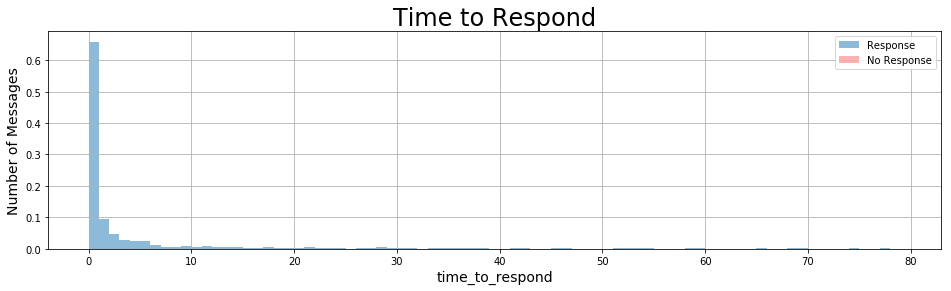

time_to_respond with response: 4.931798806
time_to_respond without response: nan




In [94]:
plt.title('Time to Respond',fontsize=24) 
plot_feature('time_to_respond', bins = np.arange(0, 80, 1))

### Urgency

In [236]:
user_df['urgency'] = user_df.available-user_df.created

In [237]:
user_df['urgency'] = user_df['urgency'].apply(lambda x: x.days)

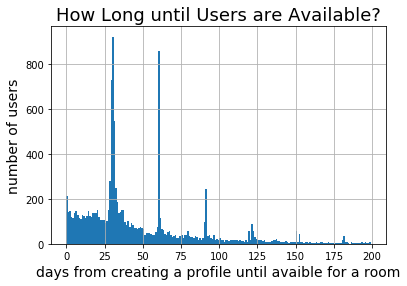

In [238]:
plt.title('How Long until Users are Available?',fontsize=18) 
user_df['urgency'].hist(bins=range(0,200))
plt.xlabel("days from creating a profile until avaible for a room",fontsize=14)
plt.ylabel('number of users',fontsize=14)
plt.show()

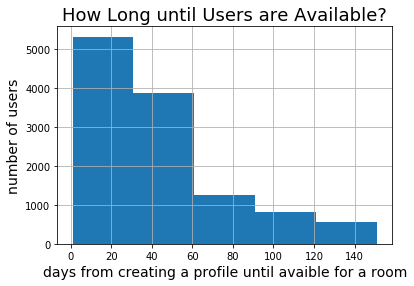

In [240]:
plt.title('How Long until Users are Available?',fontsize=18) 
user_df['urgency'].hist(bins=range(1,180,30))
plt.xlabel("days from creating a profile until avaible for a room",fontsize=14)
plt.ylabel('number of users',fontsize=14)
plt.show()

25738

## 2 - distance

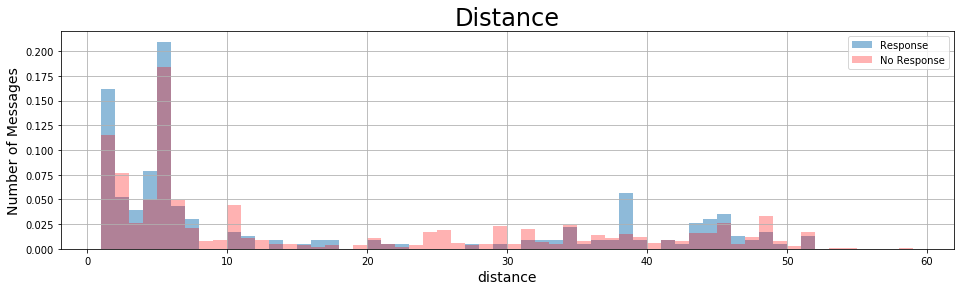

distance with response: 7.078856902
distance without response: 9.546948322




In [223]:
plt.title('Distance',fontsize=24) 
plot_feature('distance', bins=range(1,60))

## 3-Urgency Sender

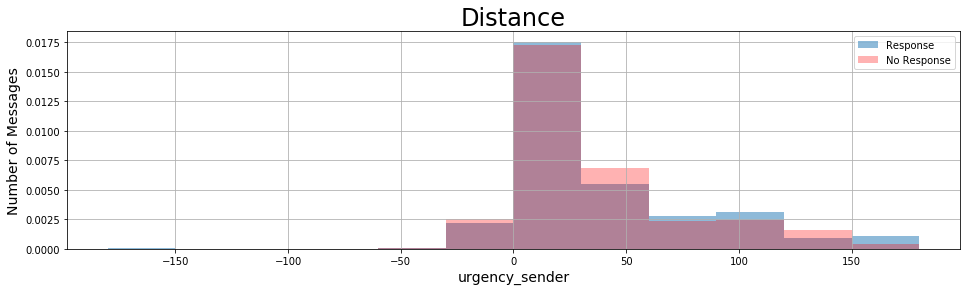

urgency_sender with response: -21.995133820
urgency_sender without response: -81.780934171




In [246]:
plt.title('Distance',fontsize=24) 
plot_feature('urgency_sender',bins=range(-180, 210,30))

# AVERAGE MESSAGES SENT AND RECIEVED

AttributeError: 'DataFrame' object has no attribute 'my_count'

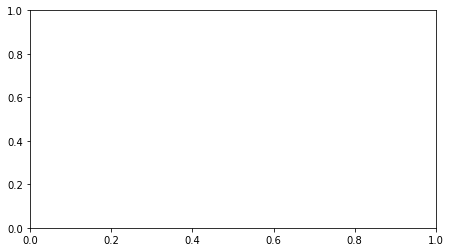

In [98]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax1.hist(convo_df.groupby('uid_sender').count().my_count,bins = range(30))
ax1.set_title('Messages sent')

ax2 = fig.add_subplot(122)
ax2.hist(convo_df.groupby('uid_receiver').count().my_count,bins = range(30))
ax2.set_title('Messages received')
ax2.set_title('Messages received')
plt.show()

print("Out of {} messages:".format(convo_df.groupby('uid_sender').count().my_count.sum()))
print(" - users who sent messages sent {:.4} on average".format( 
            convo_df.groupby('uid_sender').count().my_count.mean()))

print(" - users who received messages received {:.4} on average".format(
            convo_df.groupby('uid_receiver').count().my_count.mean()))
print("\n")
print("Out of {} onboarded users:".format(len(user_df)))
print(" - {} unique users sent messages".format(len(convo_df.uid_sender.unique())))
print(" - {} unique users received messages".format(len(convo_df.uid_receiver.unique())))
      
      
either = len(set(convo_df.uid_sender).union(set(convo_df.uid_receiver)))
both = len(set(convo_df.uid_sender).intersection(set(convo_df.uid_receiver)))
print(" - {} unique users sent or received messages".format(either))
print(" - {} unique users sent and received messages".format(both))

# LENGTH OF CONVERSATION

In [ ]:
grouped = message_df.groupby('conversation_id').count().const

print("{} messages were sent".format(grouped.sum()))
print("The longest conversation was {} messages".format(grouped.max()))
print("On average, conversations lasted {:.3} messages".format(grouped.mean()))

# COST RANGE

In [ ]:
user_df['cost_range'] = user_df.maxCost-user_df.minCost
user_df.cost_range.hist(bins=range(0,2000,50))
plt.show()

# NUM ROOMMATES

In [ ]:
x = user_df.groupby('numRoommates').created.count().index
y = user_df.groupby('numRoommates').created.count().values
plt.bar(x, y)
plt.xlim(0,11)

# CONVERSATIONS

### basic info

In [ ]:
print("There are {} conversation.".format(len(convo_df)))

In [ ]:
response_rate = convo_df.response.sum()/len(convo_df)
print("Messages get responses {:.2} of the time.".format(response_rate))

# USERS

### CREATED

In [ ]:
user_df.created.hist(figsize=(16,2), bins=100);

In [ ]:
user_df.updated.hist(figsize=(16,2), bins=100);

### TIME FROM CREATED TO UPDATED

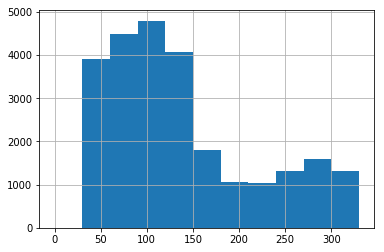

In [232]:
user_df["update-created"] = user_df.updated-user_df.created
# user_df["update-created"] = user_df["update-created"].apply(lambda x: pd.to_datetime(x*100000000))
user_df["update-created"] = user_df["update-created"].apply(lambda x: x.days)
user_df["update-created"].hist(bins=range(0,350,30))

In [ ]:
group users based on less than 30, more than thirty

### ABOUT

#### length

In [ ]:
user_df.len_about.hist(bins=range(1, 1000, 10), figsize = [10, 3])
plt.title("Lenght of 'about' Section")
plt.tight_layout()

#### percent responding

In [ ]:
wth = user_df[user_df.len_about > 0].count()['about']
wthout = user_df[user_df.len_about == 0].count()['about']
print('total number of user entries: {}'.format(wth+wthout))
print('number with about sections: {}'.format(wth))
print('number without about sections: {}'.format(wthout))
print('percent with about sections: {}'.format(wth/(wth+wthout)))

In [ ]:
user_df[user_df.len_about>0].about.values

### BIRTHDAY

In [ ]:
user_df.age.hist(bins=range(16,100), figsize=(16,2));

### LOCATION

In [116]:
user_df.metro.unique()

array(['Chicago', 'Phoenix', 'San Francisco Bay Area', None, 'Los Angeles',
       'Fort Lauderdale', 'San Diego', 'Unknown', 'Washington',
       'Minneapolis / St Paul', 'Detroit Metro', 'Dallas / Fort Worth',
       'Hawaii', 'South Florida', 'Atlanta', 'Boston', 'Tampa Bay Area',
       'New York City', 'Portland', 'Sacramento', 'Seattle-Tacoma',
       'Ft Myers / Sw Florida', 'Philadelphia',
       'Oxnard-Thousand Oaks-Ventura', 'Orange County CA', 'Not Listed'], dtype=object)

In [115]:
user_df.location[0][0]

-87.6638186

In [100]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

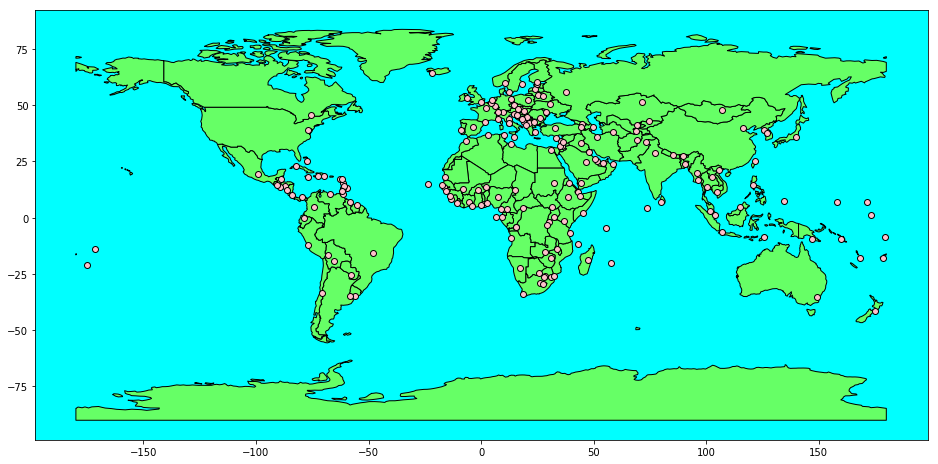

In [114]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='#66FF66', edgecolor='black')
cities.plot(ax=ax, color='pink', edgecolor='black')

ax.set_facecolor("#00FFFF")
plt.show();

In [101]:
user_df.location = user_df.location.apply(lambda x: x if isinstance(x, list) else [0,0])

In [102]:
geometry = [Point(xy) for xy in user_df.location]
loc_df = user_df.location
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)


# geometry = [Point(xy) for xy in zip(user_df.longitude, user_df.latitude)]
# loc_df = user_df[['longitude', 'latitude']]
# crs = {'init': 'epsg:4326'}
# gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)

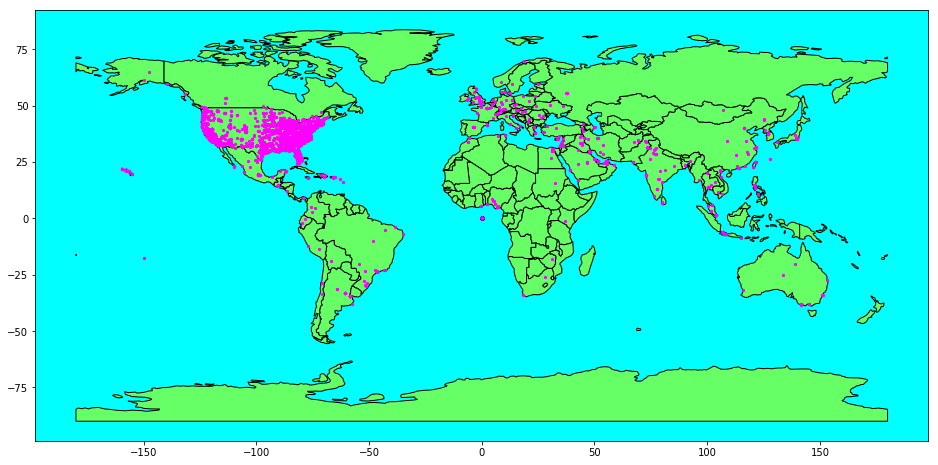

In [103]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

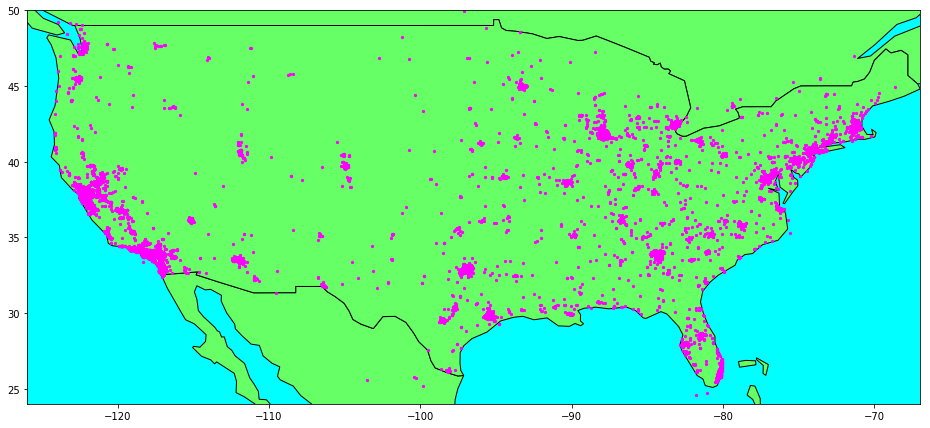

In [104]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-126, -67])
ax.set_ylim([24, 50])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

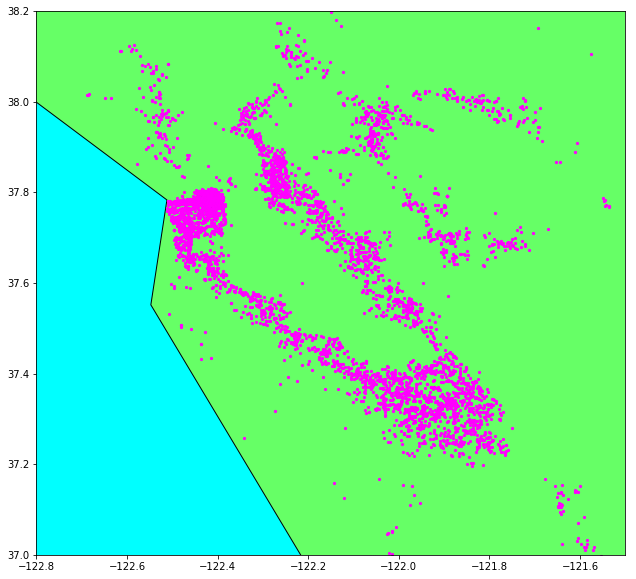

In [105]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-122.8, -121.5])
ax.set_ylim([37, 38.2])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

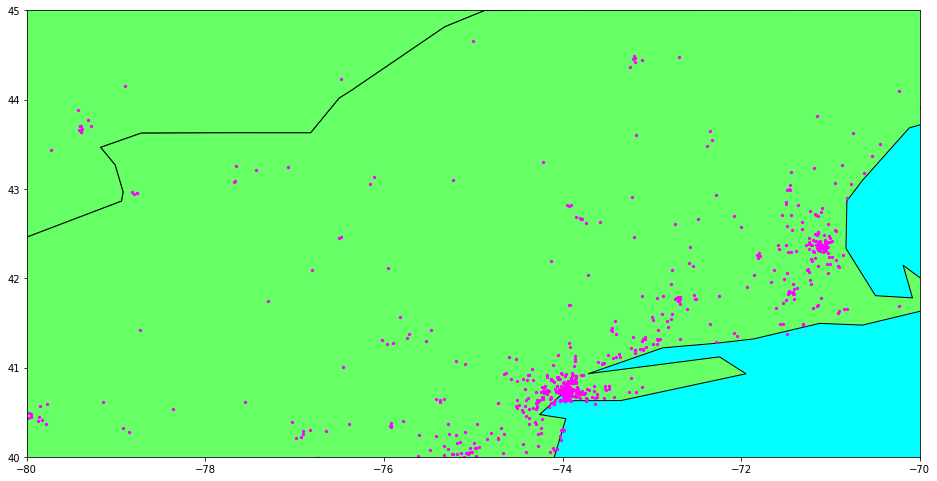

In [106]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-80, -70])
ax.set_ylim([40, 45])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

In [107]:
master_df = mp.unjson_it('data_master')
master_df['const'] = 1

In [118]:
messages_with_responses = master_df[master_df.response== True]
messages_with_responses.columns

Index(['I_count_receiver', 'I_count_sender', 'I_ratio_receiver',
       'I_ratio_sender', 'about_receiver', 'about_sender', 'activeAt_receiver',
       'activeAt_sender', 'age_dif', 'age_receiver',
       ...
       'type_sender', 'uid_receiver', 'uid_sender', 'updated_receiver',
       'updated_sender', 'urgency_receiver', 'urgency_sender', 'work_receiver',
       'work_sender', 'const'],
      dtype='object', length=136)

In [119]:
messages_with_responses.groupby('uid_sender').const.count().mean()

1.6685633001422475

In [120]:
messages_without_responses.groupby('first_uid').const.count().mean()

NameError: name 'messages_without_responses' is not defined

In [ ]:
master_df.groupby('first_uid').const.count().mean()

In [143]:
all_cities = ['Chicago', 'Phoenix', 'San Francisco', 'Los Angeles',
       'Fort Lauderdale', 'San Diego', 'Washington DC',
       'Minneapolis', 'Detroit Metro', 'Dallas',
       'Hawaii', 'South Florida', 'Atlanta', 'Boston', 'Tampa',
       'New York City', 'Portland', 'Sacramento', 'Seattle',
       'Ft Myers', 'Philadelphia']

In [123]:
cities = pd.read_csv('/Users/gandalf/Documents/data/worldcities.csv')
cities = cities.set_index('city')

In [145]:
user_df.metro.unique()

array(['Chicago', 'Phoenix', 'San Francisco Bay Area', None, 'Los Angeles',
       'Fort Lauderdale', 'San Diego', 'Unknown', 'Washington',
       'Minneapolis / St Paul', 'Detroit Metro', 'Dallas / Fort Worth',
       'Hawaii', 'South Florida', 'Atlanta', 'Boston', 'Tampa Bay Area',
       'New York City', 'Portland', 'Sacramento', 'Seattle-Tacoma',
       'Ft Myers / Sw Florida', 'Philadelphia',
       'Oxnard-Thousand Oaks-Ventura', 'Orange County CA', 'Not Listed'], dtype=object)

In [149]:
old_city_names = ['Chicago', 'Phoenix', 'San Francisco Bay Area', 'Los Angeles',
       'Fort Lauderdale', 'San Diego', 'Washington',
       'Minneapolis / St Paul', 'Detroit Metro', 'Dallas / Fort Worth',
       'Hawaii', 'South Florida', 'Atlanta', 'Boston', 'Tampa Bay Area',
       'New York City', 'Portland', 'Sacramento', 'Seattle-Tacoma',
       'Ft Myers / Sw Florida', 'Philadelphia']

new_city_names = ['Chicago', 'Phoenix', 'San Francisco', 'Los Angeles',
       'Fort Lauderdale', 'San Diego', 'Washington, D.C.',
       'Minneapolis', 'Detroit', 'Dallas',
       'Honolulu', 'Miami', 'Atlanta', 'Boston', 'Tampa',
       'New York', 'Portland', 'Sacramento', 'Seattle',
       'Ft. Myers', 'Philadelphia']
city_dic = {}
for room_city, db_city in zip(old_city_names, new_city_names):
    city_dic[room_city] = (cities.loc[db_city].lat,cities.loc[db_city].lng)
city_dic

{'Atlanta': (33.83001385, -84.399949379999995),
 'Boston': (42.329960139999997, -71.070013669999994),
 'Chicago': (41.82999066, -87.750054969999994),
 'Dallas / Fort Worth': (32.820023820000003, -96.840016930000004),
 'Detroit Metro': (42.329960139999997, -83.080055790000003),
 'Fort Lauderdale': (26.136064879999999, -80.141785519999999),
 'Ft Myers / Sw Florida': (26.640297669999999, -81.86049199),
 'Hawaii': (21.30687644, -157.85799790000002),
 'Los Angeles': (city
  Los Angeles   -37.460002
  Los Angeles    33.989978
  Name: lat, dtype: float64, city
  Los Angeles    -72.359987
  Los Angeles   -118.179980
  Name: lng, dtype: float64),
 'Minneapolis / St Paul': (44.979979270000001, -93.251786339999995),
 'New York City': (40.749979060000001, -73.980016930000005),
 'Philadelphia': (39.999973160000003, -75.169995970000002),
 'Phoenix': (33.539979879999997, -112.06999170000002),
 'Portland': (city
  Portland   -38.340000
  Portland    43.672162
  Portland    45.520024
  Name: lat, dtype

In [150]:
city_dictionary = {'Atlanta': (33.83001385, -84.399949379999995),
 'Boston': (42.329960139999997, -71.070013669999994),
 'Chicago': (41.82999066, -87.750054969999994),
 'Dallas / Fort Worth': (32.820023820000003, -96.840016930000004),
 'Detroit Metro': (42.329960139999997, -83.080055790000003),
 'Fort Lauderdale': (26.136064879999999, -80.141785519999999),
 'Ft Myers / Sw Florida': (26.640297669999999, -81.86049199),
 'Hawaii': (21.30687644, -157.85799790000002),
 'Los Angeles': (33.989978,-118.179980),
 'Minneapolis / St Paul': (44.979979270000001, -93.251786339999995),
 'New York City': (40.749979060000001, -73.980016930000005),
 'Philadelphia': (39.999973160000003, -75.169995970000002),
 'Phoenix': (33.539979879999997, -112.06999170000002),
 'Portland': (45.520024,-122.679990),
 'Sacramento': (38.575021380000003, -121.47003810000001),
 'San Diego': (32.820023820000003, -117.1799899),
 'San Francisco Bay Area': (37.74000775, -122.459978),
 'Seattle-Tacoma': (47.570002049999999, -122.33998500000001),
 'South Florida': (25.787610699999998, -80.224106079999999),
 'Tampa Bay Area': (27.946987929999999, -82.458620850000003),
 'Washington': (38.899549380000003, -77.009418580000002)}

In [203]:
user_df['keep1'] = user_df.metro.apply(lambda x: isinstance(x, str))
user_df['keep2'] = user_df.location.apply(lambda x: isinstance(x, list))

helpful_users = user_df[user_df.keep1 & user_df.keep2]

In [204]:
helpful_users['location2'] = helpful_users.metro.map(city_dictionary)

In [205]:
def dist_to_metro(row):
    try:
        lst = row.location
        tup = row.location2
        x = lst[0]-tup[0]
        y = lst[1]-tup[1]
        return (x**2+y**2)**(.5)
    except:
        return None

In [206]:
helpful_users['my_dist'] = helpful_users.apply(dist_to_metro, axis=1)

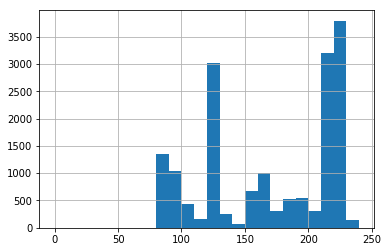

In [214]:
helpful_users['my_dist'].hist(bins=np.arange(0,250,10))

In [213]:
helpful_users['my_dist']

00DMWuKDFs    183.315529
00kOFrnYJu    189.944750
00xCAIRuOH    223.951728
013LzOrVju    215.343437
01iDVeaXl1    214.971995
01qEx4cUTH    156.296888
021QQEg1bF    225.798639
025AJiLvBy    214.937735
02HrdIFiGM    220.963975
02ICQW0SJo    212.056275
02Wvx6BcIx    215.409158
02YZk2jBsW    215.316675
02i1Py9KrY    226.535218
02sjTzcsaO    150.143680
033WjGQA2R           NaN
03Hj6Jhiwc    122.970835
03ePCiaOjo    128.143491
04YPftEyNC    196.985740
04nBNyZxKG    163.907467
04qukRTG2L    207.887079
05EWHMF9P7    226.325644
05aBzbOZUI    225.902657
05bYrFYcrd    103.533058
05eQw0RbGl    226.573694
05iutyhbhw    215.382356
05zJjPzvLZ    215.210938
066cXiCM2Y    167.836811
06NNYh1vDW     84.295905
06amha1Pqm    193.882660
06nzANB58Z    236.773446
                 ...    
ztmK7PnUHw    211.855722
zuAFgNUthd    215.362349
zuk55ZvGrY    127.448038
zumiILIPGT    150.216707
zuyVQ7V5lF    159.966652
zvAWBdm1vG    102.250393
zvI46wf797    168.737127
zvUCErEB3w    179.837747
zvVGoLgtlL    127.448038


# CONVERSATION LENGTH

In [ ]:
master_df

# COMPARE RESPONSE RATES

In [ ]:
# separate dataset into with and without responses
messages_with_responses = master_df[master_df.response == 1]
messages_without_responses = master_df[master_df.response == 0]

In [ ]:
messages_with_responses.columns

In [ ]:
# fn to display plot
def plot_feature(col, bins=None):
    with_resp = messages_with_responses[col].hist(figsize = (16,4), bins = bins, normed=True, alpha = .5)
    without_rest = messages_without_responses[col].hist(figsize = (16,4), bins = bins,normed=True, alpha = .3, color='r')
    
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Number of Messages',fontsize=14)
    plt.legend(['Response',"No Response"])
    plt.show()
    print(col+" with response: {:.9f}".format(messages_with_responses[col].mean()))
    print(col+" without response: {:.9f}\n\n".format(messages_without_responses[col].mean()))

# LENGTH OF ABOUT

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('len_about_sender', range(1, 2000, 50))
plot_feature('len_about_receiver', range(1, 2000, 50))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('sentence_ratio_sender')
plot_feature('sentence_ratio_receiver')

# urgency_receiver 

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('urgency_sender', bins=(range(0,10000000000,1000000000)))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('distance', bins = range(5,200, 10))

# AGE OF RESPONDENTS

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('age_sender',range(16,60))
plot_feature('age_receiver',range(16,60))

# MAX COST

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('maxCost_sender')
plot_feature('maxCost_receiver')

# HOBBIES OVERLAP

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('hobbies_overlap')

# AGE DIFFERENCE

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('age_dif', range(40))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('type_sender',range(0,3))
plot_feature('type_receiver',range(0,3))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 

plot_feature('age_receiver',range(0,100,1))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('isStudent_sender',range(0,3))
plot_feature('isStudent_receiver',range(0,3))

# MIN COST

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('minCost_sender',range(0,2000,50))
plot_feature('minCost_receiver',range(0,2000,50))

# LEN OF FIRST MESSAGE

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('first_len', range(0,500, 10))

In [ ]:
df = mp.unjson_it('data_master_full')
df = mp.reinstate_date(df, ['activeAt_receiver', 'activeAt_sender',
                            'available_receiver', 'available_sender',
                            'birthday_receiver', 'birthday_sender',
                            'updated_receiver','updated_sender', 
                            'urgency_receiver', 'urgency_sender'])
print("Make sure we're not using ECT data")
print(df.timestamp.max())

In [ ]:
df = df[df.timestamp > pd.to_datetime('2017-02-01').date()]
df.timestamp.min()

In [ ]:
df.timestamp.hist(figsize = (16,4))
plt.show()

In [ ]:
df.timestamp = df.timestamp.apply(lambda x: x.date())

In [ ]:
df.timestamp.min()

In [ ]:
df['iso'] = df.timestamp.apply(lambda x: x.isocalendar())
df['week'] = df['iso'].apply(lambda x: x[1])
df['month'] = df['timestamp'].apply(lambda x: x.month)

In [ ]:
df.groupby('week')

In [ ]:
df['const']=1
message_per_day = df.groupby('timestamp').count().const
message_per_week = df.groupby('week').count().const

plt.plot(message_per_week)

In [ ]:
plt.plot(df.groupby('week').mean().response)

In [ ]:
plt.plot(df.groupby('month').mean().response)

In [ ]:
df.groupby('month').mean().response

In [ ]:
master_df.columns

# MALE VS FEMALE

In [ ]:
from_male_df = master_df[master_df.gender_sender == 1]
from_female_df = master_df[master_df.gender_sender == 0]
to_male_df = master_df[master_df.gender_receiver == 1]
to_female_df = master_df[master_df.gender_receiver == 0]

In [ ]:
print("Response rate when men reach out: {:.3}".format(from_male_df.response.mean()))
print("Response rate when women reach out: {:.3}".format(from_female_df.response.mean()))

In [ ]:
print("Response rate of men: {:.3}".format(to_male_df.response.mean()))
print("Response rate of women: {:.3}".format(to_female_df.response.mean()))

In [ ]:
print("{:.3} of messages are sent by men".format(master_df.gender_sender.sum()/len(master_df)))
print("men make up {:.3} of users".format(len(user_df[user_df.gender=='male'])/len(user_df)))